<a href="https://colab.research.google.com/github/swarnava-96/Google-Stock-Price-Validation-using-LSTM/blob/main/GOOG_Stock_Price_Validation_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GOOG Stock Price Validation using LSTM**

In this project I will check how LSTMs work on predicting stock prices. I will take the "GOOG" stock prices for the entire year of 2016 as my training data and I will predict the stock prices for the month of January, 2017. The test data contains the actual stock prices for January 2017. The goal is to verify how well LSTM performs as I already know the actual stock prices for January, 2017. The dataset was collected from Yahoo Finance. Here, I will consider the feature "Open" and based on that, I will predict and validate.

### Importing the necessary libraries

In [1]:
cd "/content/drive/MyDrive/Data"

/content/drive/MyDrive/Data


In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the Training Data set

In [3]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
# Lets see the last 5 records

dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [5]:
# Lets see the shape of the dataset

dataset_train.shape

(1258, 6)

In [6]:
# Lets take the feature "Open" for our further analysis

training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Data Preprocessing

In [7]:
# Feature Scaling

# Importing Sklearn's MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initializing MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

# Fitting and transforming the train data
training_set_scaled = scaler.fit_transform(training_set)

In [8]:
# lets see the length of training_set_scaled

len(training_set_scaled)

1258

In [9]:
# Creating a data structure with 60 time steps and 1 output

X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
  X_train.append(training_set_scaled[i - 60 : i,0])
  y_train.append(training_set_scaled[i, 0])

# Converting the lists X_train, y_train into arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
# Reshaping the two dimensional array X_train into 3D as LSTM requires that

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Building the RNN LSTM

In [11]:
# Importing tensorflow version 2.5.0

!pip install tensorflow==2.5

In [12]:
import tensorflow as tf

In [13]:
# Lets check the version

tf.__version__

'2.5.0'

In [14]:
# Importing the Keras library and packages

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [15]:
# Initializing the RNN

regressor = Sequential()

In [16]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Droput
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the Output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

In [17]:
# Lets see the model summary

regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [18]:
# Fitting the RNN to the training dataset

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 117ms/step - loss: 0.0345
Epoch 2/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0063
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0053
Epoch 12/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0044
Epoch 13/100

### Getting the predicted stock price of 2017

In [19]:
# Loading the test dataset

dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [20]:
# Lets see the shape of the test data

dataset_test.shape

(20, 6)

In [21]:
# Lets concatenate the train and test data

dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis = 0)

In [22]:
# Lets take the "Open" fetaure for prediction as we trained our model on the "Open" feature itself
real_stock_price = dataset_test.iloc[:, 1:2].values

In [23]:
# Data Preprocessing

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values

inputs = inputs.reshape(-1,1)

inputs = scaler.transform(inputs)

In [24]:
# lets see the length of inputs 

len(inputs)

80

In [25]:
# Creating a data structure with 60 time steps and 1 output
X_test = []

for i in range(60, len(inputs)):
  X_test.append(inputs[i - 60 : i, 0])

# Lets convert the list X_test into array
X_test = np.array(X_test)

# Reshaping into 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
# Prediction

predicted_stock_price = regressor.predict(X_test)

In [27]:
# Inverse transforming the data

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

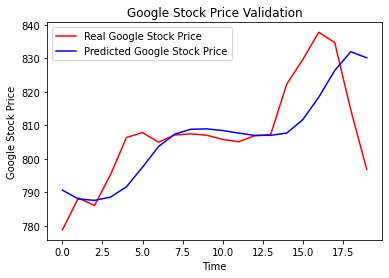

In [28]:
# Lets visualize and validate the actual VS predicted stock prices

plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Validation")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show();

We can conclude that the model worked very well. Though getting the exact values is beyond our scope but the model captured the trend well.